Chart saved to /workspaces/Nutrition_Tracker/src/graphs/graph.png


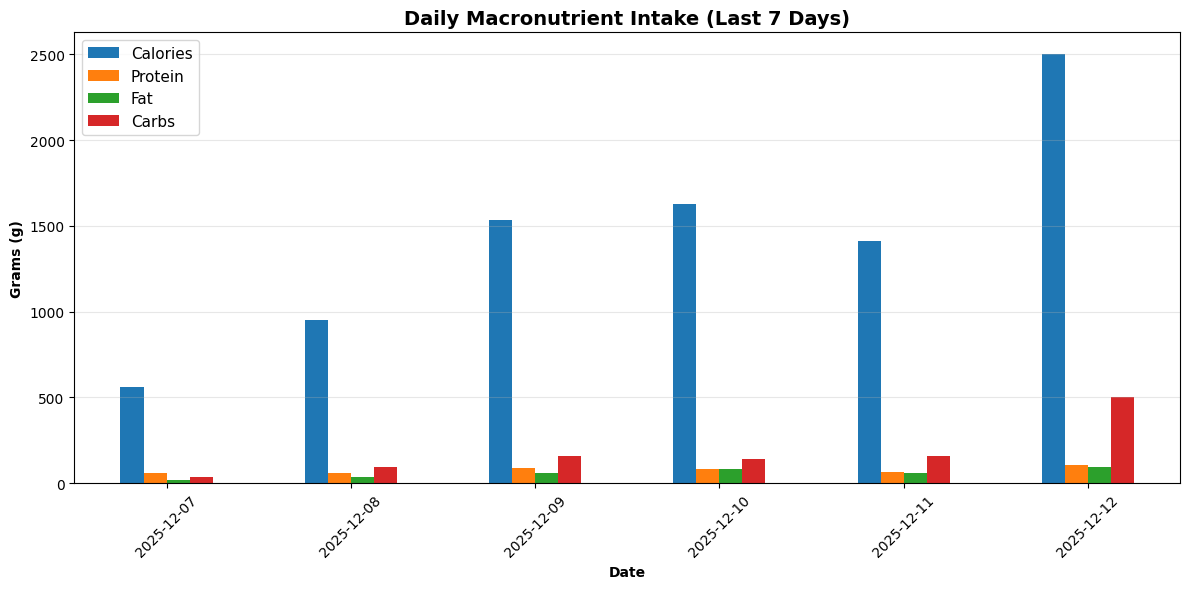

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import data
import ui

def create_nutrition_graph():
    """Create and save a nutrition graph for the last 7 days."""

    # Create graphs directory if it doesn't exist
    graphs_dir = os.path.join(os.getcwd(), "graphs")
    os.makedirs(graphs_dir, exist_ok=True)
    graph_file_path = os.path.join(graphs_dir, "graph.png")

    # 1. Load and Process
    entries = data.get_entries_within_week()

    if not entries:
        ui.format_entries_failed("No entries found for the last 7 days.")
        return
    else:
        df = pd.DataFrame(entries)
        
        # Convert types and handle errors
        df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
        df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
        df['Protein'] = pd.to_numeric(df['Protein'], errors='coerce')
        df['Fat'] = pd.to_numeric(df['Fat'], errors='coerce')
        df['Carbs'] = pd.to_numeric(df['Carbs'], errors='coerce')
        df.dropna(subset=['DateTime'], inplace=True)
        df.fillna(0, inplace=True)
        
        if df.empty:
            ui.format_entries_failed("No valid entries found for the last 7 days after processing.")
            return
        else:
            # Group by Date
            daily = df.groupby(df['DateTime'].dt.date)[['Calories', 'Protein', 'Fat', 'Carbs']].sum()
            
            # 2. Plotting
            fig, ax = plt.subplots(figsize=(12, 6))
            
            # Plot: Macronutrients (grouped bar)
            daily[['Calories','Protein', 'Fat', 'Carbs']].plot(kind='bar', ax=ax, rot=45)
            ax.set_title('Daily Macronutrient Intake (Last 7 Days)', fontweight='bold', fontsize=14)
            ax.set_ylabel('Grams (g)', fontweight='bold')
            ax.set_xlabel('Date', fontweight='bold')
            ax.legend(['Calories', 'Protein', 'Fat', 'Carbs'], loc='upper left', fontsize=11)
            ax.grid(axis='y', alpha=0.3)
            
            plt.tight_layout()

            try:
                plt.savefig(graph_file_path)
                ui.chart_generation_successful(f"Chart saved to {graph_file_path}")
            except Exception as e:
                ui.add_nutrition_failed(f"Failed to save chart: {e}")
        
            plt.show()
        